In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1-3

In [13]:
diamond_file = 'C:/Python39/data/diamonds.csv'
diamonds = pd.read_csv(diamond_file)  # encoding='euc-kr' , 'CP949' , 'MS949', 'UTF-8', 'UTF-16'
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [14]:
FRACTION = 0.005
diamonds = diamonds.sample(frac=FRACTION)

In [15]:
xdata = diamonds['price']
ydata = diamonds['depth']
table = diamonds['table']

In [16]:
mycolor = ['r', 'g', 'b', 'y', 'm']
cut_list = diamonds['cut'].unique()
cut_list

array(['Ideal', 'Premium', 'Very Good', 'Fair', 'Good'], dtype=object)

In [17]:
cut_dict = {cut_list[idx]:mycolor[idx] for idx in range(len(cut_list))}    # cut에 따른 색상 지정
cut_dict

{'Ideal': 'r', 'Premium': 'g', 'Very Good': 'b', 'Fair': 'y', 'Good': 'm'}

In [18]:
def recode_cut(cut):
    return cut_dict[cut]

In [19]:
# 문자열 데이터를 숫자형으로 변환
diamonds['newcut'] = diamonds['cut'].apply(recode_cut)
newcut = diamonds['newcut'] # 범주형 자료(숫자형)

In [20]:
def recode_table(table):
    if table >= 60:
        return 100
    elif table >= 58:
        return 30
    elif table >= 54:
        return 5
    else :
        return 1

In [21]:
diamonds['newtable'] = diamonds['table'].apply(recode_table)
newtable = diamonds['newtable'] # 범주형 자료(숫자형)

In [22]:
table_dict = dict(zip([1, 5, 30, 100], ['54.0 미만', '54.0 ~ 57.9', '58.0 ~ 59.9', '60.0 이상']))
table_dict

{1: '54.0 미만', 5: '54.0 ~ 57.9', 30: '58.0 ~ 59.9', 100: '60.0 이상'}

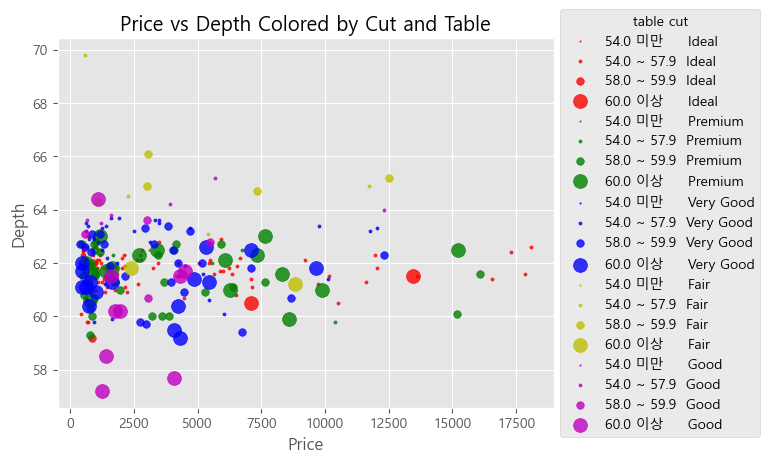

In [23]:
plt.style.use('ggplot')

scatter_plot = plt.figure()
ax1 = scatter_plot.add_subplot(1, 1, 1)

for k, c in cut_dict.items():
    for s in [1, 5, 30, 100]:
        scatter = ax1.scatter(x=xdata[(diamonds['newcut'] ==  c) & (diamonds['newtable'] ==  s)],
                              y=ydata[(diamonds['newcut'] ==  c) & (diamonds['newtable'] ==  s)],
                              s=s, c=c, label=f'{table_dict[s]:<10}  {k}', alpha=0.8)


ax1.set_title('Price vs Depth Colored by Cut and Table')
ax1.set_xlabel('Price')
ax1.set_ylabel('Depth')

ax1.legend(title="table cut", loc='center left', bbox_to_anchor=(1, 0.5))

In [24]:
def cut_to_int(cut):
    return dict(zip(mycolor, range(len(mycolor))))[cut]

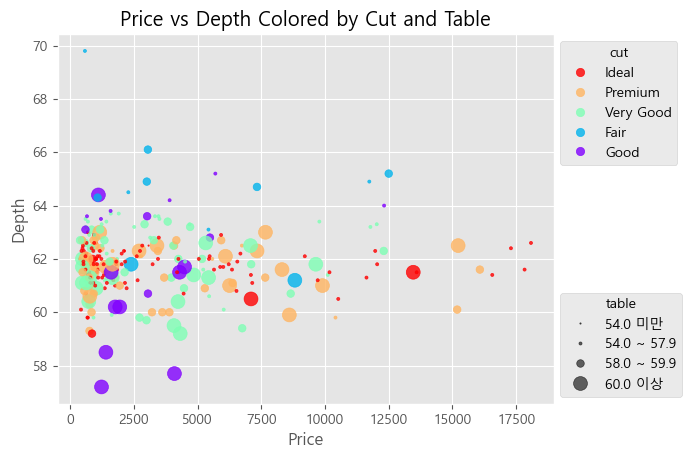

In [25]:
plt.style.use('ggplot')

scatter_plot = plt.figure()
ax1 = scatter_plot.add_subplot(1, 1, 1)

scatter = ax1.scatter(x=xdata, y=ydata, s=newtable, c=newcut.apply(cut_to_int), cmap='rainbow_r', alpha=0.8)


ax1.set_title('Price vs Depth Colored by Cut and Table')
ax1.set_xlabel('Price')
ax1.set_ylabel('Depth')


handles, labels = scatter.legend_elements()

legend1 = ax1.legend(handles, cut_list,
                    loc="upper left", title="cut", bbox_to_anchor=(1, 1))
ax1.add_artist(legend1)


handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
legend2 = ax1.legend(handles, ['54.0 미만', '54.0 ~ 57.9', '58.0 ~ 59.9', '60.0 이상'],
                     loc="lower left", title="table", bbox_to_anchor=(1, 0))

plt.savefig('17011740_김민식_데이터시각화_HW1-3.png', bbox_extra_artists=(legend1, legend2), bbox_inches='tight')